In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import sklearn.preprocessing
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns

import wrangle as w

## 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [2]:
# get the clean data
df = w.wrangle_zillow()

In [3]:
# check it out
df.head()

,bedcount,bathcount,sqfeet,value,yearbuilt,taxamount,fips
4,4.0,2.0,3633,296425.0,2005,6941.39,6037
6,3.0,4.0,1620,847770.0,2011,10244.94,6037
7,3.0,2.0,2077,646760.0,1926,7924.68,6037
11,0.0,0.0,1200,5328.0,1972,91.60,6037
14,0.0,0.0,171,6920.0,1973,255.17,6037


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   bedcount   float64
 1   bathcount  float64
 2   sqfeet     int64  
 3   value      float64
 4   yearbuilt  int64  
 5   taxamount  float64
 6   fips       object 
dtypes: float64(4), int64(2), object(1)
memory usage: 130.6+ MB


In [5]:
# remove the discrete columns to prep for scaling
df = df.drop(columns=['yearbuilt','fips'])
# Instructor answer -  remove value column since it is the target
# change year back to continuous and do analysis on it

In [6]:
# double check it's all continuous data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   bedcount   float64
 1   bathcount  float64
 2   sqfeet     int64  
 3   value      float64
 4   taxamount  float64
dtypes: float64(4), int64(1)
memory usage: 98.0 MB


In [7]:
# split the data
train, validate, test = w.split_zillow(df)

In [8]:
# check it out
train.head()

,bedcount,bathcount,sqfeet,value,taxamount
600291,3.0,1.0,919,363438.0,4563.12
1465690,4.0,3.0,1892,629340.0,7585.83
2009603,4.0,2.0,2224,388825.0,4679.10
2088361,3.0,2.0,1409,224380.0,3091.22
1181326,3.0,1.0,1059,632000.0,7247.50


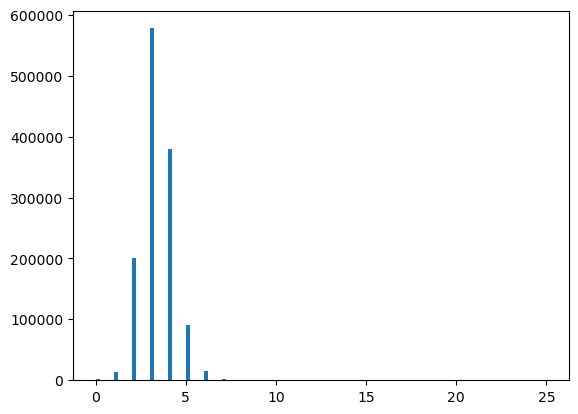

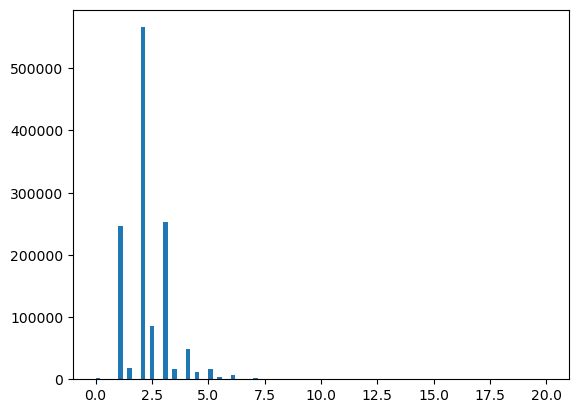

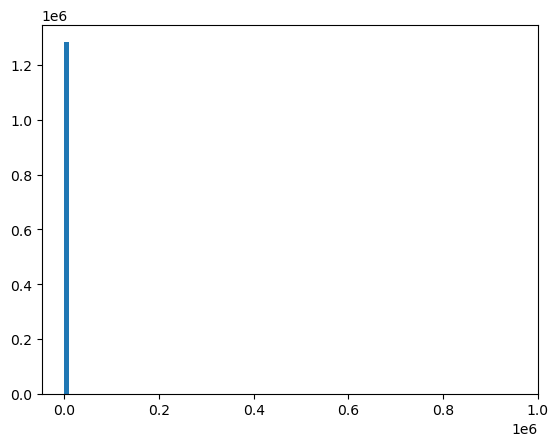

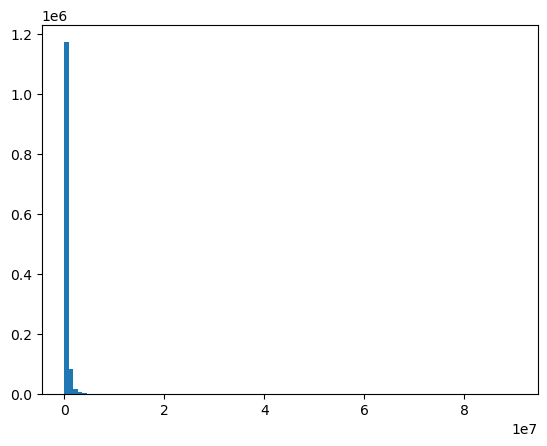

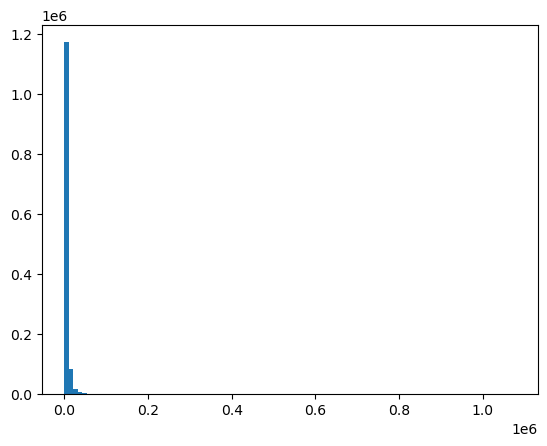

In [9]:
# visualize before scaling
for col in train.columns:
    plt.figure()
    plt.hist(train[col], bins=100)

In [10]:
#scaling fit
scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(train)

train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [11]:
train_scaled = pd.DataFrame(train_scaled)

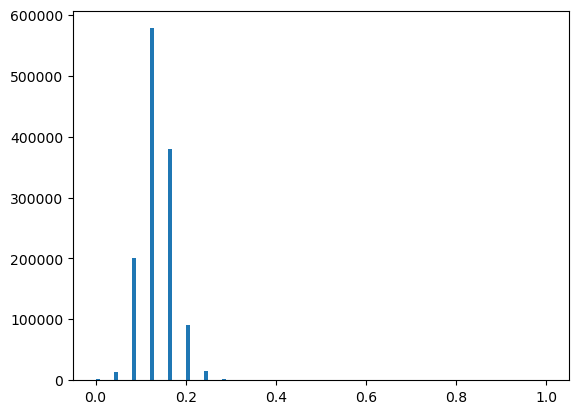

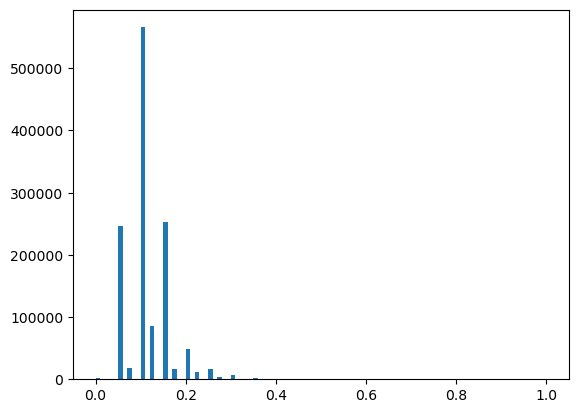

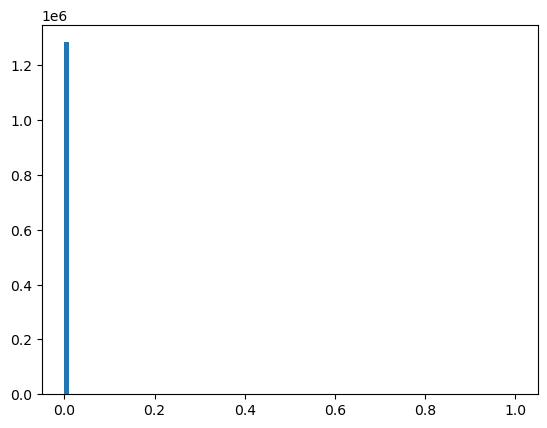

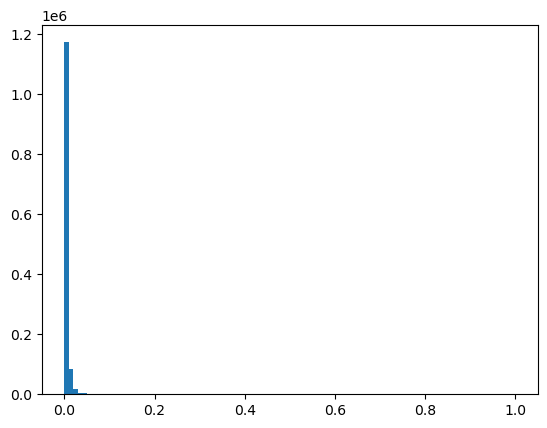

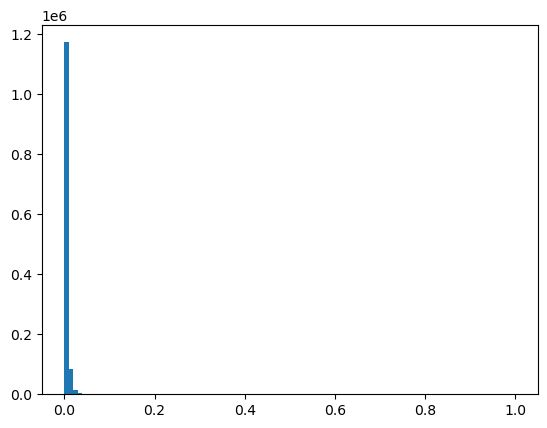

In [12]:
# visualize the scaled data
for col in train_scaled.columns:
    plt.figure()
    plt.hist(train_scaled[col], bins=100)


## 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [13]:
# inverse transform

train_inverse_scaled = scaler.inverse_transform(train_scaled)
validate_inverse_scaled = scaler.inverse_transform(validate_scaled)
test_inverse_scaled = scaler.inverse_transform(test_scaled)

In [14]:
train_inverse_scaled = pd.DataFrame(train_inverse_scaled)

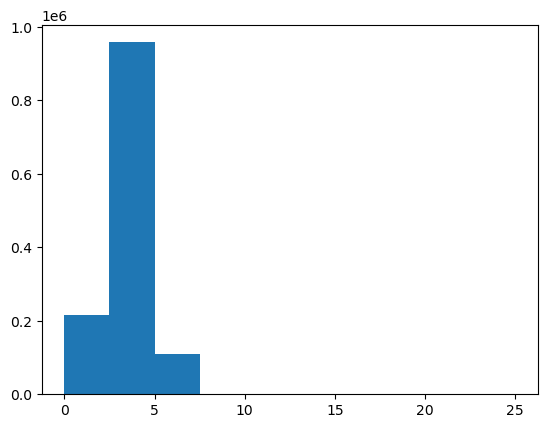

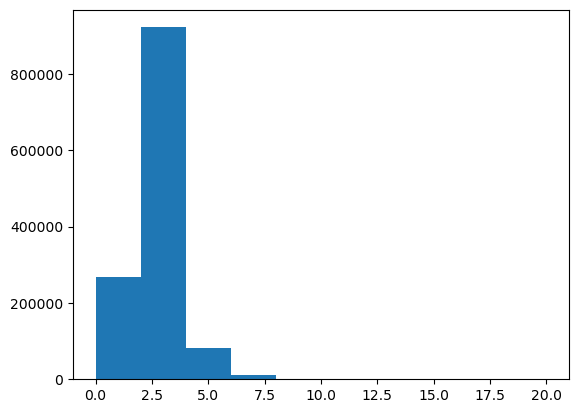

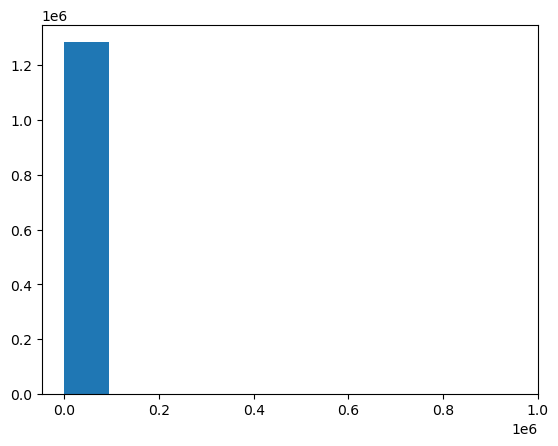

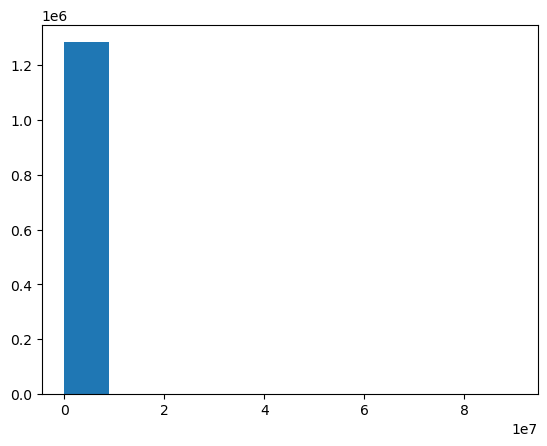

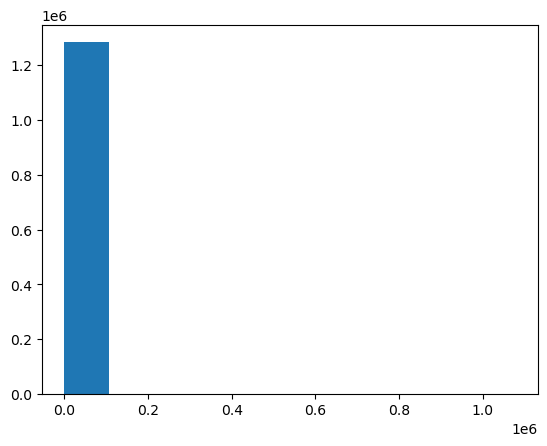

In [15]:
# visualize the scaled data
for col in train_inverse_scaled.columns:
    plt.figure()
    plt.hist(train_inverse_scaled[col])

## 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [16]:
# quantile transformer
qt = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

train_quantile_scaled = qt.fit_transform(train)
validate_quantile_scaled = qt.transform(validate)
test_quantile_scaled = qt.transform(test)



In [17]:
train_quantile_scaled = pd.DataFrame(train_quantile_scaled)

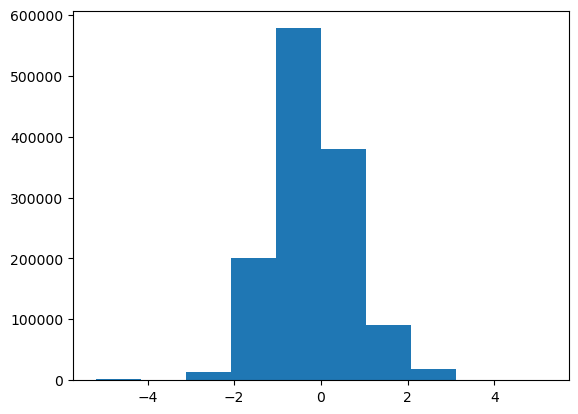

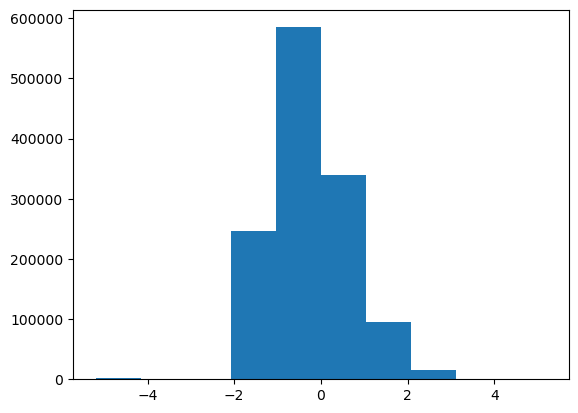

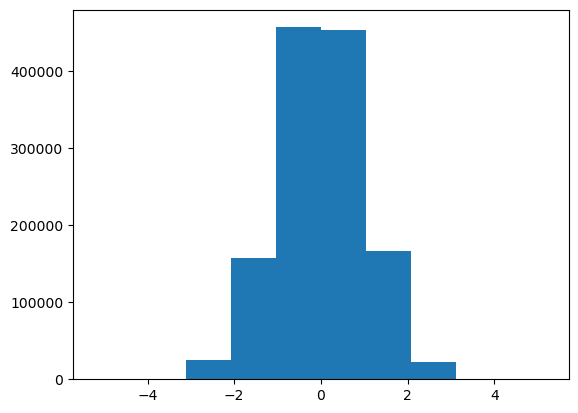

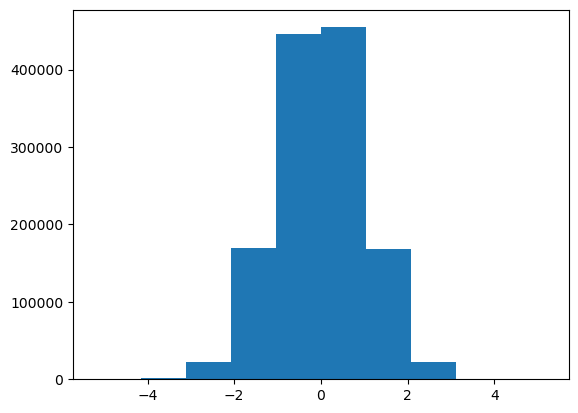

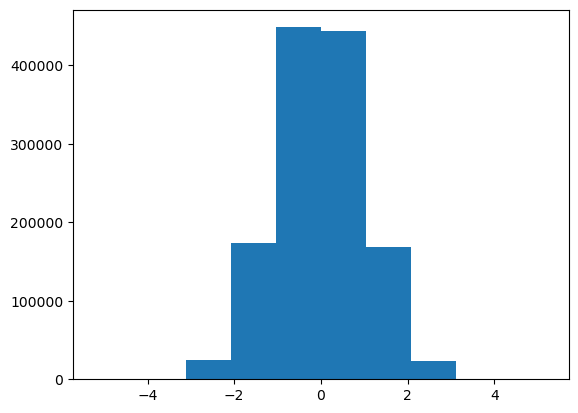

In [18]:
# visualize the scaled data
for col in train_quantile_scaled.columns:
    plt.figure()
    plt.hist(train_quantile_scaled[col])

## 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [19]:
# quantile transformer
qt = sklearn.preprocessing.QuantileTransformer()

train_quantile_scaled = qt.fit_transform(train)
validate_quantile_scaled = qt.transform(validate)
test_quantile_scaled = qt.transform(test)


In [20]:
train_quantile_scaled = pd.DataFrame(train_quantile_scaled)

In [29]:
train_quantile_scaled.head()

,0,1,2,3,4
0,0.390390,0.096096,0.055770,0.547808,0.562456
1,0.761261,0.816316,0.639640,0.809858,0.819910
2,0.761261,0.427928,0.748749,0.585775,0.575505
3,0.390390,0.427928,0.357357,0.311067,0.338267
4,0.390390,0.096096,0.115782,0.811317,0.802797


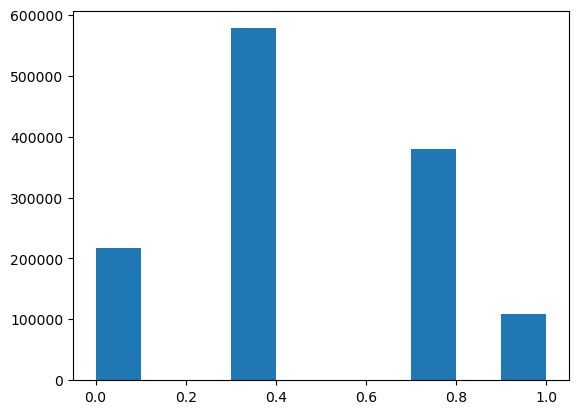

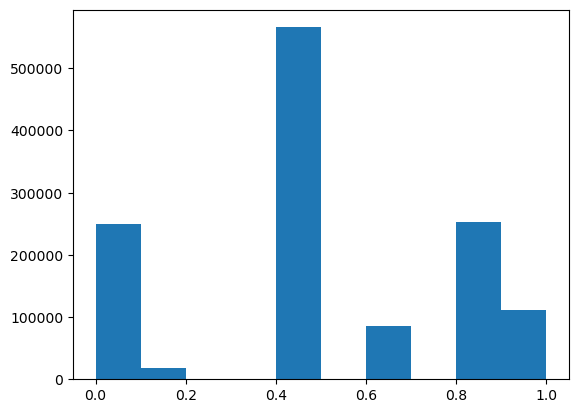

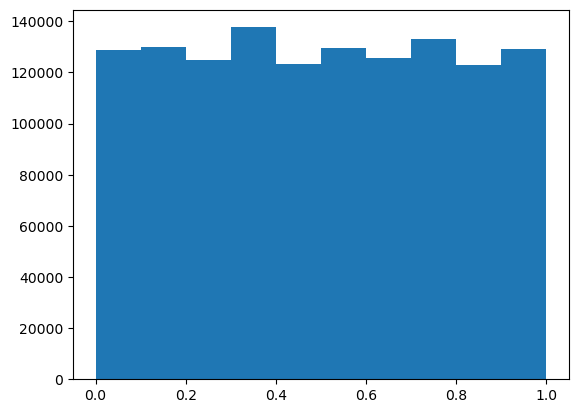

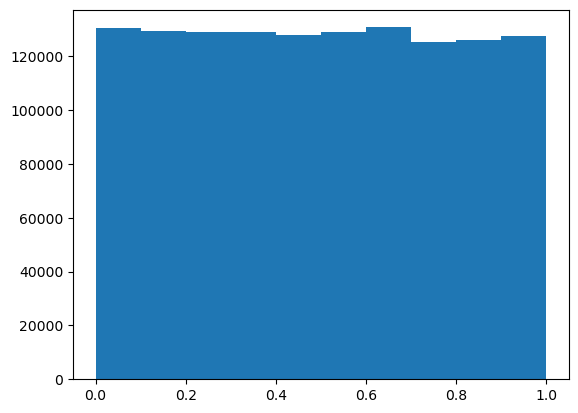

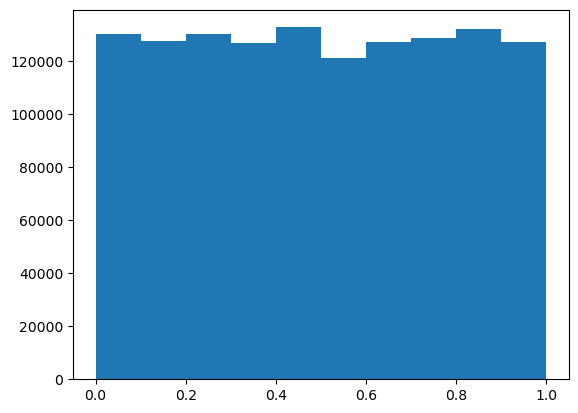

In [21]:
# visualize the scaled data
for col in train_quantile_scaled.columns:
    plt.figure()
    plt.hist(train_quantile_scaled[col])

## 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [31]:
def scaled_data(train, validate, test):
    '''This function takes in the train, validate, and test dataframes and returns the scaled data as dataframes.'''
    
    scaler = sklearn.preprocessing.MinMaxScaler()

    scaler.fit(train)

    train_scaled = pd.DataFrame(scaler.transform(train))
    validate_scaled = pd.DataFrame(scaler.transform(validate))
    test_scaled = pd.DataFrame(scaler.transform(test))
    
    return train_scaled, validate_scaled, test_scaled

In [32]:
train_scaled, validate_scaled, test_scaled = scaled_data(train, validate, test)

train_scaled.head(), validate_scaled.head(), test_scaled.head()

(      0     1         2         3         4
 0  0.12  0.05  0.000964  0.004030  0.004227
 1  0.16  0.15  0.001985  0.006978  0.007030
 2  0.16  0.10  0.002334  0.004311  0.004334
 3  0.12  0.10  0.001478  0.002488  0.002861
 4  0.12  0.05  0.001111  0.007007  0.006717,
       0     1         2         3         4
 0  0.16  0.10  0.001618  0.002126  0.001778
 1  0.16  0.10  0.001520  0.000658  0.000912
 2  0.16  0.15  0.002454  0.003180  0.004109
 3  0.12  0.05  0.001082  0.003494  0.003647
 4  0.12  0.10  0.001368  0.000650  0.000835,
       0      1         2         3         4
 0  0.20  0.275  0.004292  0.022495  0.020547
 1  0.16  0.100  0.002458  0.005873  0.005259
 2  0.12  0.050  0.001036  0.003644  0.003716
 3  0.12  0.100  0.001275  0.003595  0.003612
 4  0.16  0.125  0.001897  0.007496  0.006794)